In [1]:
%pip install pandas
import pandas as pd

# Load cleaned flight data
df = pd.read_csv('../data/Cleaned_Flight_Data.csv', parse_dates=[
    'Scheduled_Departure', 'Actual_Departure', 'Scheduled_Arrival', 'Actual_Arrival'
])

df.head()

  Using cached pandas-2.3.2-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.2-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- -----------------

,S.No,Flight Number,Date,From,To,Aircraft,Flight time,STD,ATD,STA,ATA,Scheduled_Departure,Actual_Departure,Scheduled_Arrival,Actual_Arrival,Departure_Delay_Min,Arrival_Delay_Min
0,NaN,,2025-07-25,Mumbai (BOM),Chandigarh (IXC),A20N (VT-EXU),01:54:00,06:00:00,06:20:00,08:10:00,Landed 8:14 AM,2025-07-25 06:00:00,2025-07-25 06:20:00,2025-07-25 08:10:00,2025-07-25 08:14:00,20.0,4.0
1,NaN,,2025-07-24,Mumbai (BOM),Chandigarh (IXC),A20N (VT-RTJ),01:54:00,06:00:00,06:07:00,08:10:00,Landed 8:01 AM,2025-07-24 06:00:00,2025-07-24 06:07:00,2025-07-24 08:10:00,2025-07-24 08:01:00,7.0,-9.0
2,NaN,,2025-07-23,Mumbai (BOM),Chandigarh (IXC),A20N (VT-TQB),02:04:00,06:00:00,06:20:00,08:10:00,Landed 8:23 AM,2025-07-23 06:00:00,2025-07-23 06:20:00,2025-07-23 08:10:00,2025-07-23 08:23:00,20.0,13.0
3,NaN,,2025-07-22,Mumbai (BOM),Chandigarh (IXC),A20N (VT-RTU),01:50:00,06:00:00,07:30:00,08:10:00,Landed 9:20 AM,2025-07-22 06:00:00,2025-07-22 07:30:00,2025-07-22 08:10:00,2025-07-22 09:20:00,90.0,70.0
4,NaN,,2025-07-21,Mumbai (BOM),Chandigarh (IXC),A20N (VT-EXK),01:50:00,06:00:00,06:11:00,08:10:00,Landed 8:01 AM,2025-07-21 06:00:00,2025-07-21 06:11:00,2025-07-21 08:10:00,2025-07-21 08:01:00,11.0,-9.0


  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/8.1 MB 5.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 1.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.8 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.4 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.4 MB/s eta 0:00:04
   --------------- ---

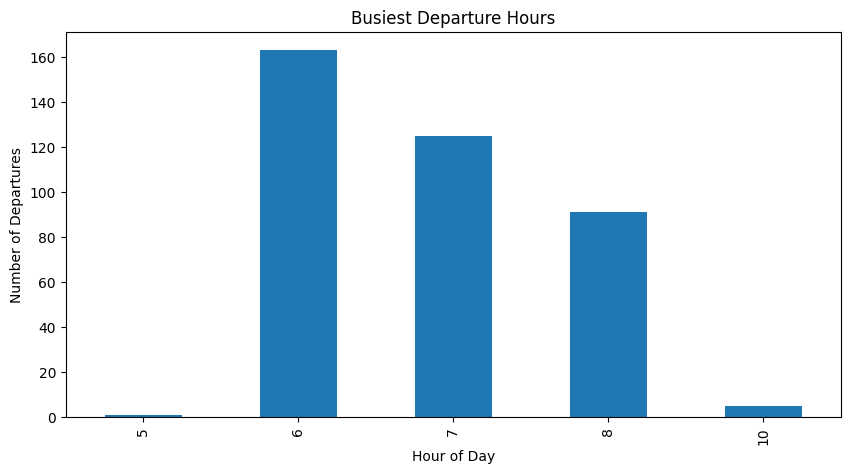

In [2]:
%pip install matplotlib
import matplotlib.pyplot as plt

# Extract hour from Scheduled_Departure
df['Departure_Hour'] = df['Scheduled_Departure'].dt.hour

# Count number of flights per hour
hourly_counts = df['Departure_Hour'].value_counts().sort_index()

# Plot busiest slots
plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Departures')
plt.title('Busiest Departure Hours')
plt.show()

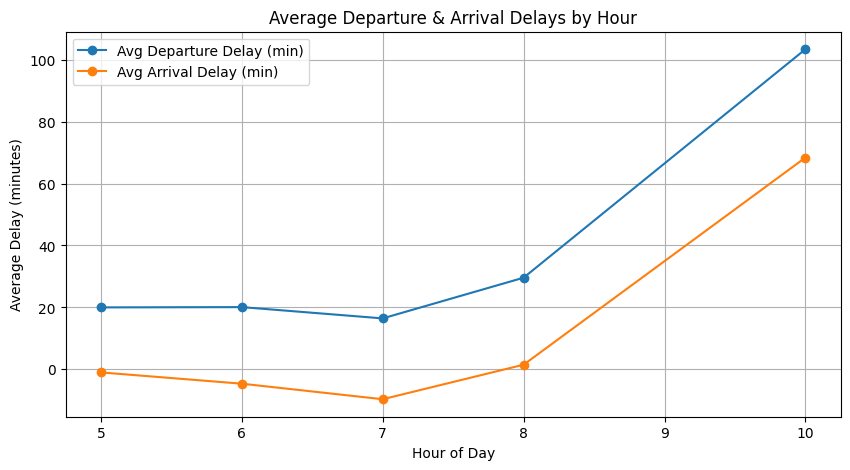

In [3]:
# Calculate average departure and arrival delay per hour
avg_dep_delay = df.groupby('Departure_Hour')['Departure_Delay_Min'].mean()
avg_arr_delay = df.groupby('Departure_Hour')['Arrival_Delay_Min'].mean()

# Plot average delays by hour
plt.figure(figsize=(10,5))
plt.plot(avg_dep_delay.index, avg_dep_delay.values, marker='o', label='Avg Departure Delay (min)')
plt.plot(avg_arr_delay.index, avg_arr_delay.values, marker='o', label='Avg Arrival Delay (min)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Departure & Arrival Delays by Hour')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Find flights with highest arrival delays
top_delayed = df.sort_values('Arrival_Delay_Min', ascending=False).head(10)

# Show details of these flights
top_delayed[['Flight Number', 'Date', 'Scheduled_Arrival', 'Actual_Arrival', 'Arrival_Delay_Min']]

,Flight Number,Date,Scheduled_Arrival,Actual_Arrival,Arrival_Delay_Min
160,,2025-07-25,2025-07-25 09:15:00,2025-07-25 12:32:00,197.0
165,,2025-07-19,2025-07-19 09:15:00,2025-07-19 12:25:00,190.0
341,,2025-07-20,2025-07-20 11:15:00,2025-07-20 13:53:00,158.0
94,,2025-07-21,2025-07-21 07:30:00,2025-07-21 09:52:00,142.0
327,,2025-07-21,2025-07-21 10:25:00,2025-07-21 12:26:00,121.0
339,,2025-07-23,2025-07-23 11:15:00,2025-07-23 13:16:00,121.0
335,,2025-07-20,2025-07-20 10:00:00,2025-07-20 11:48:00,108.0
340,,2025-07-21,2025-07-21 11:15:00,2025-07-21 12:51:00,96.0
334,,2025-07-21,2025-07-21 10:00:00,2025-07-21 11:35:00,95.0
368,,2025-07-21,2025-07-21 10:20:00,2025-07-21 11:49:00,89.0


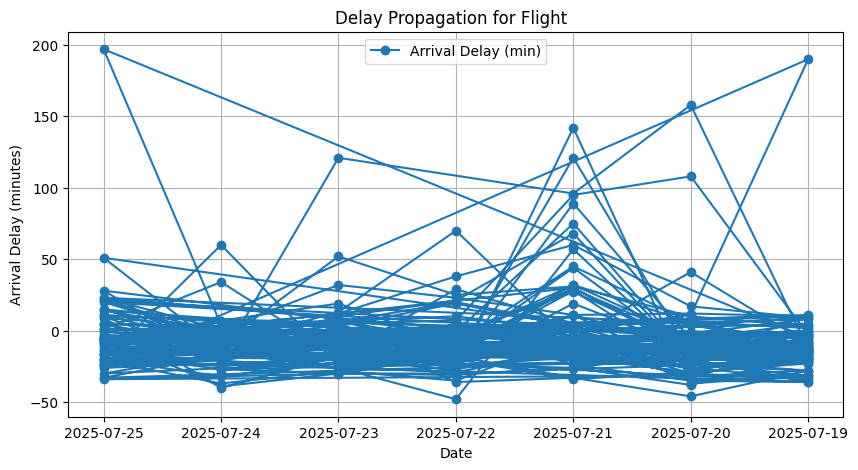

In [5]:
# Pick a flight number to analyze (e.g., the most delayed one)
flight_id = top_delayed.iloc[0]['Flight Number']

# Filter data for this flight
flight_chain = df[df['Flight Number'] == flight_id]

# Plot delays over days
plt.figure(figsize=(10,5))
plt.plot(flight_chain['Date'], flight_chain['Arrival_Delay_Min'], marker='o', label='Arrival Delay (min)')
plt.xlabel('Date')
plt.ylabel('Arrival Delay (minutes)')
plt.title(f'Delay Propagation for Flight {flight_id}')
plt.legend()
plt.grid(True)
plt.show()

Note: you may need to restart the kernel to use updated packages.


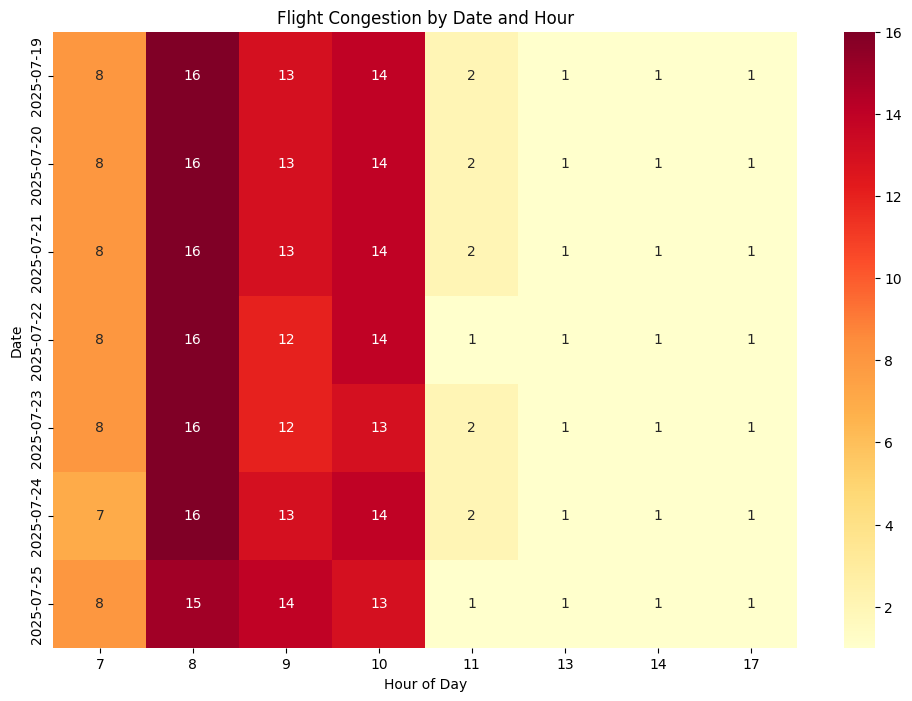

Flights with consistent delays:
                   mean  count        std
Flight Number                            
              -3.867188    384  29.707021


In [6]:
%pip install seaborn
import seaborn as sns

# Add arrival hour for congestion analysis
df['Arrival_Hour'] = df['Scheduled_Arrival'].dt.hour

# Create congestion heatmap
plt.figure(figsize=(12,8))
flight_pivot = pd.crosstab(df['Date'], df['Arrival_Hour'])
sns.heatmap(flight_pivot, cmap="YlOrRd", annot=True, fmt='d')
plt.title('Flight Congestion by Date and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.show()

# Identify flights with consistent delays
flight_delay_stats = df.groupby('Flight Number')['Arrival_Delay_Min'].agg(['mean', 'count', 'std'])
flight_delay_stats = flight_delay_stats[flight_delay_stats['count'] > 1]  # At least 2 occurrences
flight_delay_stats = flight_delay_stats.sort_values('mean', ascending=False)

print("Flights with consistent delays:")
print(flight_delay_stats.head(10))

In [7]:
import numpy as np

# Let's identify overcrowded hours
congested_hours = hourly_counts[hourly_counts > hourly_counts.mean() + hourly_counts.std()].index.tolist()
print(f"Congested hours (above average + standard deviation): {congested_hours}")

# Simple optimization suggestion - move flights from congested to less congested hours
def suggest_flight_reschedule(df, congested_hours):
    suggestions = []
    
    # Get flights in congested hours
    congested_flights = df[df['Departure_Hour'].isin(congested_hours)].copy()
    
    # For each congested hour, suggest less congested hours (-1 or +1 hour)
    for hour in congested_hours:
        flights = congested_flights[congested_flights['Departure_Hour'] == hour]
        less_congested_hours = []
        
        # Find less congested adjacent hours
        for adj_hour in [hour-1, hour+1]:
            if 0 <= adj_hour <= 23 and adj_hour not in congested_hours:
                less_congested_hours.append(adj_hour)
        
        if less_congested_hours:
            for _, flight in flights.iterrows():
                target_hour = np.random.choice(less_congested_hours)
                suggestions.append({
                    'Flight Number': flight['Flight Number'],
                    'Date': flight['Date'],
                    'Current Hour': hour,
                    'Suggested Hour': target_hour,
                    'Current Departure': flight['Scheduled_Departure'],
                    'Avg Delay': flight['Departure_Delay_Min']
                })
    
    return pd.DataFrame(suggestions)

# Generate suggestions
schedule_suggestions = suggest_flight_reschedule(df, congested_hours)
print("\nTop optimization suggestions:")
print(schedule_suggestions.head(10))

Congested hours (above average + standard deviation): [6]

Top optimization suggestions:
  Flight Number        Date  Current Hour  Suggested Hour   Current Departure  \
0                2025-07-25             6               5 2025-07-25 06:00:00   
1                2025-07-24             6               7 2025-07-24 06:00:00   
2                2025-07-23             6               7 2025-07-23 06:00:00   
3                2025-07-22             6               7 2025-07-22 06:00:00   
4                2025-07-21             6               5 2025-07-21 06:00:00   
5                2025-07-19             6               5 2025-07-19 06:00:00   
6                2025-07-25             6               7 2025-07-25 06:00:00   
7                2025-07-24             6               7 2025-07-24 06:00:00   
8                2025-07-23             6               7 2025-07-23 06:00:00   
9                2025-07-22             6               7 2025-07-22 06:00:00   

   Avg Delay  
0   